In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from soupsieve.util import lower
import matplotlib.pyplot as plt


# 데이터로드

In [2]:
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
products_df = pd.read_csv('data/olist_products_dataset.csv')
geolocation_df = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
order_reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')
trans_df = pd.read_csv('data/product_category_name_translation.csv')


# 폰트 설정

In [3]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 결측치 처리

In [4]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [6]:
orders_df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
# 결측치가 있는 행 제거
orders_df = orders_df.dropna()


In [8]:
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [9]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [10]:
# 결측치가 있는 행 제거
products_df = products_df.dropna()

In [11]:
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [12]:
geolocation_df.isnull().sum()


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [13]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [15]:
order_reviews_df =order_reviews_df.dropna()

# 삭제 후 컬럼 확인
print(order_reviews_df.columns)


Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


In [16]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

# olist_customers_dataset.csv

## 도시별 주문수 (상위5개)

In [17]:
customers_df.shape

(99441, 5)

In [18]:
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [19]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


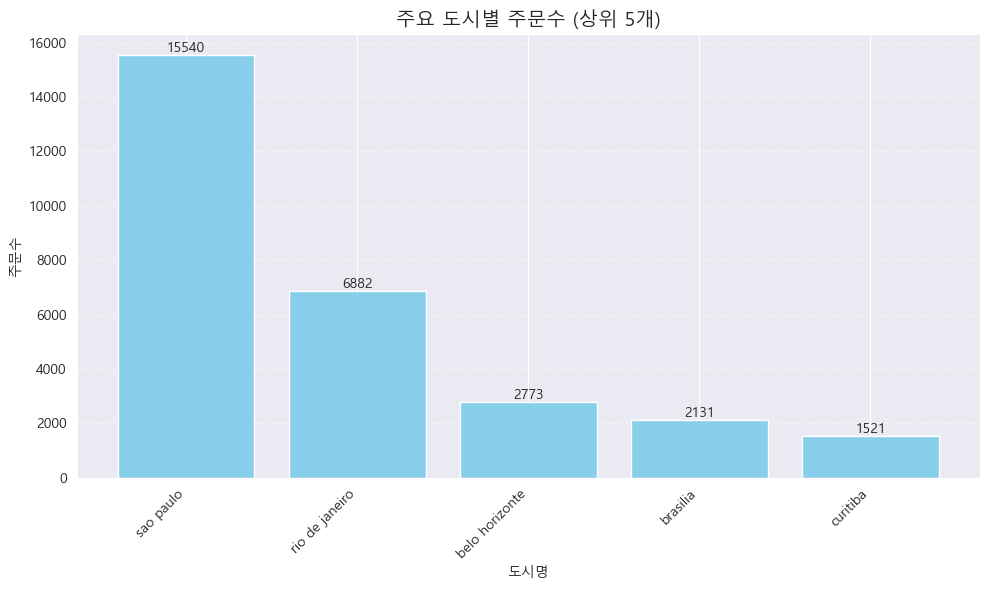

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform



# 2️⃣ 도시별 주문수 집계
city_order_counts = customers_df['customer_city'].value_counts().reset_index()
city_order_counts.columns = ['customer_city', 'order_count']

# 3️⃣ 상위 5개 도시만 추출
top_5_cities = city_order_counts.head(5)

# 4️⃣ 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_cities['customer_city'], top_5_cities['order_count'], color='skyblue')

plt.title('주요 도시별 주문수 (상위 5개)', fontsize=14)
plt.xlabel('도시명')
plt.ylabel('주문수')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 막대 위에 주문수 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [21]:
# 전체 주문 건수: 99,441건
customers_df['customer_id'].nunique()

99441

In [22]:
# 고유 고객 수: 96,096명
customers_df['customer_unique_id'].nunique()

96096

In [23]:
unique_customer_df = customers_df.groupby('customer_unique_id').agg({
    'customer_id': 'count',
    'customer_city': 'nunique',
    'customer_state': 'nunique'
}).reset_index()

unique_customer_df.columns = ['customer_unique_id', 'unique_order_count', 'unique_city_count', 'unique_state_count']

In [24]:
unique_customer_df['unique_order_count'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 17])

In [25]:
unique_customer_df[unique_customer_df['unique_order_count'] > 4]

,customer_unique_id,unique_order_count,unique_city_count,unique_state_count
7175,12f5d6e1cbf93dafd9dcc19095df0b3d,6,1,1
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7,1,1
20337,35ecdf6858edc6427223b64804cf028e,5,1,1
21578,394ac4de8f3acb14253c177f0e15bc58,5,1,1
23472,3e43e6105506432c953e165fb2acf44c,9,1,1
27043,47c1a3033b8b77b3ab6e109eb4d5fdf3,6,1,1
29512,4e65032f1f574189fb793bac5a867bbc,5,1,1
32664,56c8638e7c058b98aae6d74d2dd6ea23,5,1,1
35628,5e8f38a9a1c023f3db718edcf926a2db,5,1,1
37585,63cfc61cee11cbe306bff5857d00bfe4,6,1,1


## 고객별 고유 주문수

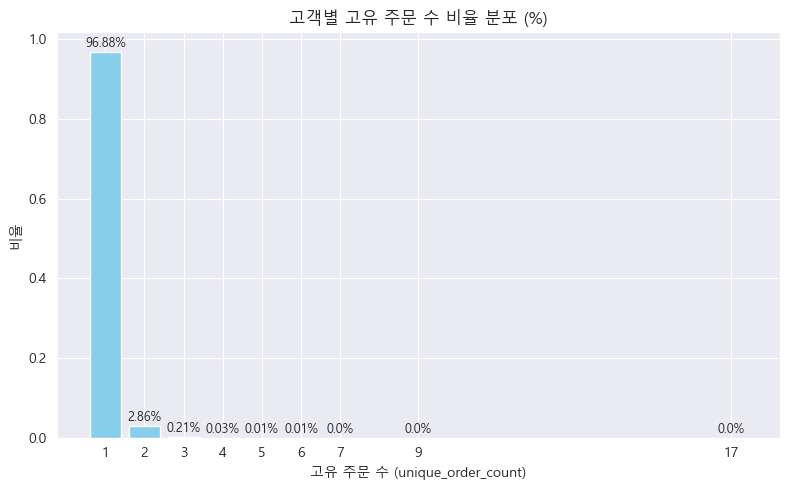

In [26]:
# 비율 계산
order_counts = unique_customer_df['unique_order_count'].value_counts(normalize=True).sort_index()
percentages = (order_counts * 100).round(2)  # 소수점 둘째 자리까지

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(order_counts.index, order_counts.values, color='skyblue')

# 라벨 및 제목
plt.xlabel('고유 주문 수 (unique_order_count)')
plt.ylabel('비율')
plt.title('고객별 고유 주문 수 비율 분포 (%)')
plt.xticks(order_counts.index)

# 막대 위에 비율 표시
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005,
             f"{percentages.iloc[i]}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 재구매고객수

In [27]:
# 재구매 고객 수: 2,997명
unique_customer_df = unique_customer_df.sort_values('unique_order_count', ascending=False)
multi_order_customers = unique_customer_df[unique_customer_df['unique_order_count'] > 1]
print(multi_order_customers['customer_unique_id'].count())

2997


In [28]:
filtered_customers = customers_df[customers_df['customer_unique_id'].isin(multi_order_customers['customer_unique_id'])]

filtered_customers.shape

(6342, 5)

In [29]:
filtered_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


# olist_order_items_dataset.csv

## 고유판매자수

In [30]:
# 고유 판매자 수: 3,095명
order_items_df['seller_id'].nunique()

3095

## 매출 80% 판매자 비중


In [31]:
# 판매자별 매출
order_items_df.groupby('seller_id')['price'].sum().sort_values(ascending=False)

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229472.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    200472.92
fa1c13f2614d7b5c4749cbc52fecda94    194042.03
7c67e1448b00f6e969d365cea6b010ab    187923.89
                                      ...    
34aefe746cd81b7f3b23253ea28bef39         8.00
702835e4b785b67a084280efca355756         7.60
1fa2d3def6adfa70e58c276bb64fe5bb         6.90
77128dec4bec4878c37ab7d6169d6f26         6.50
cf6f6bc4df3999b9c6440f124fb2f687         3.50
Name: price, Length: 3095, dtype: float64

In [32]:
# 매출 80% 판매자 비중
seller_revenue = order_items_df.groupby('seller_id')['price'].sum().sort_values(ascending=False)
total_revenue = seller_revenue.sum()
threshold = total_revenue * 0.80  # 매출 80%

cumsum_revenue = seller_revenue.cumsum()
top_sellers_mask = cumsum_revenue <= threshold
top_sellers_count = top_sellers_mask.sum()

total_sellers = seller_revenue.shape[0]
top_sellers_ratio = top_sellers_count / total_sellers * 100

print(f"총 매출의 80%를 차지하는 판매자 수: {top_sellers_count}명")
print(f"전체 판매자 중 비중: {top_sellers_ratio:.2f}%")

총 매출의 80%를 차지하는 판매자 수: 543명
전체 판매자 중 비중: 17.54%


# olist_order_payments_dataset.csv

## 결제유형별 비율

payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


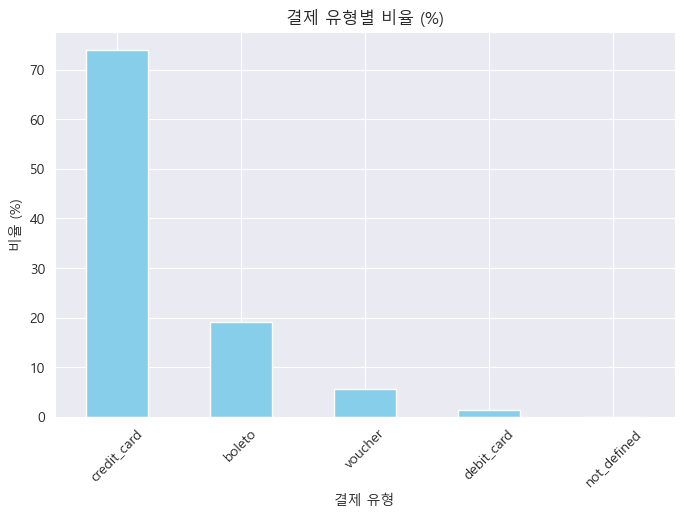

In [33]:
import pandas as pd



# 2️⃣ 결제 유형별 비율 계산 (정규화)
payment_type_ratio = order_payments_df['payment_type'].value_counts(normalize=True) * 100

# 3️⃣ 결과 출력
print(payment_type_ratio)

# 4️⃣ (선택) 시각화 - 비율 막대그래프
import matplotlib.pyplot as plt

payment_type_ratio.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('결제 유형별 비율 (%)')
plt.ylabel('비율 (%)')
plt.xlabel('결제 유형')
plt.xticks(rotation=45)
plt.show()


# olist_orders_dataset.csv

## 월별주문수 추이

In [34]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [35]:
print(orders_df['order_purchase_timestamp'].min())
print(orders_df['order_purchase_timestamp'].max())


2016-09-15 12:16:38
2018-08-29 15:00:37


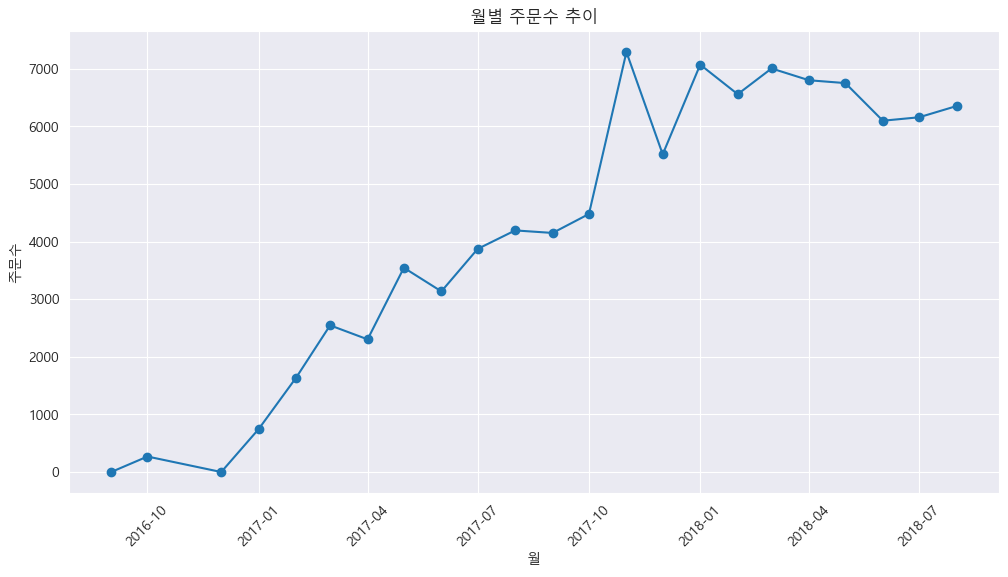

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 날짜 타입으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 2. 월별 주문 수 집계 (년-월 기준)
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders_df.groupby('order_month').size().reset_index(name='order_count')

# 3. order_month를 datetime으로 변환 (시각화를 위해)
monthly_orders['order_month'] = monthly_orders['order_month'].dt.to_timestamp()

# 4. 시각화
plt.figure(figsize=(12,6))
plt.plot(monthly_orders['order_month'], monthly_orders['order_count'], marker='o')
plt.title('월별 주문수 추이')
plt.xlabel('월')
plt.ylabel('주문수')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 평균배송일

In [37]:
import pandas as pd


# 날짜 컬럼을 datetime으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# 배송 기간(일) 계산 (배송 완료 날짜 - 구매 날짜)
orders_df['delivery_time_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# 결측치 제거 (배송 완료 날짜가 없는 경우가 있음)
valid_delivery_times = orders_df['delivery_time_days'].dropna()

# 평균 배송 기간 계산
average_delivery_days = valid_delivery_times.mean()

print(f'평균 배송 기간: {average_delivery_days:.2f}일')


평균 배송 기간: 12.09일


# 배송지연 비율

In [38]:


# 2. 배송 지연 여부 컬럼 추가
orders_df['is_late'] = orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']

# 3. 배송 지연 비율 계산
late_rate = orders_df['is_late'].mean() * 100
print(f"배송 지연 비율: {late_rate:.2f}%")


배송 지연 비율: 8.11%


# olist_order_reviews_dataset.csv

In [39]:
order_reviews_df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

## 각점수별 개수

In [40]:
order_reviews_df['review_score'].value_counts().sort_index()


review_score
1    1789
2     458
3     737
4    1433
5    5422
Name: count, dtype: int64

## 각점수별 비율

In [41]:
order_reviews_df['review_score'].value_counts(normalize=True).sort_index()


review_score
1    0.181827
2    0.046549
3    0.074906
4    0.145645
5    0.551072
Name: proportion, dtype: float64

## 점수분포시각화

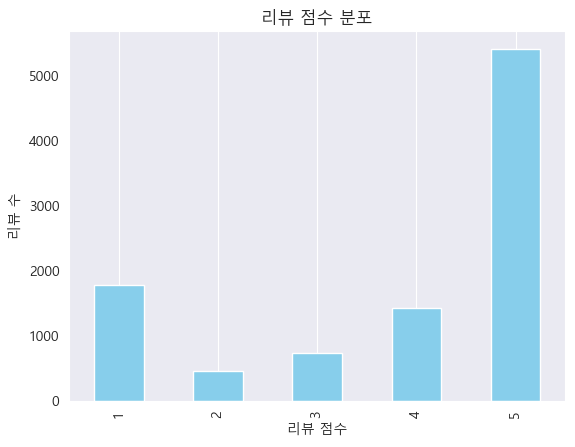

In [42]:
import matplotlib.pyplot as plt

# 점수 분포 시각화
order_reviews_df['review_score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('리뷰 점수 분포')
plt.xlabel('리뷰 점수')
plt.ylabel('리뷰 수')
plt.grid(axis='y')
plt.show()


# customers_df,orders_df 병합한 데이터
## 재구매율

In [43]:
import pandas as pd

# 고객-주문 병합 (customer_id 기준)
customer_orders_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')

# 고객의 주문 개수 계산 (customer_unique_id 기준)
customer_order_counts = customer_orders_df.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='order_count')

# 재구매 고객 (2회 이상 주문한 고객)
repeat_customers = customer_order_counts[customer_order_counts['order_count'] > 1]

# 전체 고객 수 (unique customer)
total_customers = customer_order_counts['customer_unique_id'].nunique()

# 재구매 고객 수
repeat_customers_count = repeat_customers['customer_unique_id'].nunique()

# 재구매 고객 비율
repeat_customer_rate = (repeat_customers_count / total_customers) * 100

print(f'전체 고객 수: {total_customers}')
print(f'재구매 고객 수: {repeat_customers_count}')
print(f'재구매 고객 비율: {repeat_customer_rate:.2f}%')


전체 고객 수: 93342
재구매 고객 수: 2800
재구매 고객 비율: 3.00%


# products_df 와 trans_df병합한데이터
## 판매량 상위 10개 카테고리

In [44]:
import pandas as pd

# 2️⃣ products_df와 번역 데이터 병합 (카테고리 영어 이름 붙이기)
products_df = products_df.merge(trans_df, on='product_category_name', how='left')

# 3️⃣ order_items_df와 products_df 병합 (제품 ID 기준으로)
order_items_full = order_items_df.merge(
    products_df[['product_id', 'product_category_name_english']],
    on='product_id',
    how='left'
)

# 4️⃣ 카테고리별 판매량 집계
category_sales = order_items_full['product_category_name_english'].value_counts().reset_index()
category_sales.columns = ['product_category_name_english', 'sales_count']

# 5️⃣ 판매량 상위 10개 카테고리 출력
print(category_sales.head(10))


  product_category_name_english  sales_count
0                bed_bath_table        11115
1                 health_beauty         9670
2                sports_leisure         8641
3               furniture_decor         8334
4         computers_accessories         7827
5                    housewares         6964
6                 watches_gifts         5991
7                     telephony         4545
8                  garden_tools         4347
9                          auto         4235


# 전체데이터셋 을 RFM기준으로 모델돌리기

olist_orders_dataset.csv

olist_order_payments_dataset.csv

olist_order_reviews_dataset.csv

olist_customers_dataset.csv

병합

In [45]:
# 2. orders_df와 customers_df를 customer_id 기준 병합
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

# 3. orders_customers_df와 payments_df를 order_id 기준 병합
orders_customers_payments_df = pd.merge(orders_customers_df, order_payments_df, on='order_id', how='left')

# 4. orders_customers_payments_df와 reviews_df를 order_id 기준 병합
final_df = pd.merge(orders_customers_payments_df, order_reviews_df, on='order_id', how='left')
# 5. 필요 없는 컬럼 제거
final_df = final_df.drop(['review_comment_title', 'review_comment_message'], axis=1)

# review_id와 review_score가 결측인 행 제거
final_df = final_df[
    final_df['review_id'].notnull() & final_df['review_score'].notnull()
].copy()
final_df=final_df.dropna()
# 결과 확인
print(final_df.shape)
print(final_df.columns)
print(final_df.isnull().sum())
print(final_df.shape[0])

(9871, 23)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_month', 'delivery_time_days', 'is_late', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_month                      0
delivery_time_days               0
is_late                          0
customer_unique_id               0
customer

In [46]:
final_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,delivery_time_days,...,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,13,...,barreiras,BA,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50
17,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,2018-06,13,...,goiania,GO,1.0,credit_card,10.0,146.45,5a8608437f4b52bec5cd143f37258b5e,5.0,2018-07-03 00:00:00,2018-07-03 15:10:07
28,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17 00:00:00,2018-08,4,...,sorocaba,SP,1.0,boleto,1.0,104.11,9a55cbc65c8fad47581da5ebbb2b373e,5.0,2018-08-14 00:00:00,2018-08-14 21:52:46
30,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18 00:00:00,2018-06,12,...,salvador,BA,1.0,credit_card,10.0,227.68,2d4303fd561eb4ab51c87faa6598dc10,1.0,2018-06-17 00:00:00,2018-06-20 11:38:22
35,1790eea0b567cf50911c057cf20f90f9,52142aa69d8d0e1247ab0cada0f76023,delivered,2018-04-16 21:15:39,2018-04-16 22:10:26,2018-04-18 13:05:09,2018-05-05 12:28:34,2018-05-15 00:00:00,2018-04,18,...,palmares,PE,1.0,credit_card,4.0,224.90,764c587207b9589949abd863bdb72dec,1.0,2018-05-06 00:00:00,2018-05-08 23:47:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100670,c7510fe2bce3ab54854dc588ce4d187c,f74562da630b57572d1742ba2f28b662,delivered,2018-05-16 09:05:27,2018-05-17 09:18:23,2018-05-18 14:23:00,2018-05-22 14:20:48,2018-06-21 00:00:00,2018-05,6,...,rio de janeiro,RJ,1.0,credit_card,4.0,220.12,bbe7c6000965c0d7b0a0fbd9c9fa7b24,5.0,2018-05-23 00:00:00,2018-05-26 13:43:20
100678,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:25:59,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03 00:00:00,2018-08,1,...,sao paulo,SP,1.0,credit_card,7.0,73.10,7a11bf826668febba0800ec35884958c,1.0,2018-08-31 00:00:00,2018-09-21 13:54:38
100686,a6bd1f93b7ff72cc348ca07f38ec4bee,6d63fa86bd2f62908ad328325799152f,delivered,2018-04-20 17:28:40,2018-04-24 19:26:10,2018-04-23 17:18:40,2018-04-28 17:38:42,2018-05-15 00:00:00,2018-04,8,...,sao jose do rio preto,SP,1.0,credit_card,3.0,77.23,eb4c94cf604d9cf4d4442890ac33797d,5.0,2018-04-29 00:00:00,2018-05-07 13:31:59
100704,5597332b7eded552f104108f22b023e4,aaa423fb52f4106f477683490cbd5845,delivered,2018-08-15 13:03:37,2018-08-15 13:15:22,2018-08-15 14:37:00,2018-08-17 16:06:37,2018-08-21 00:00:00,2018-08,2,...,barueri,SP,1.0,credit_card,1.0,36.46,c44004d7e60dc281ebd5361b717570c3,5.0,2018-08-18 00:00:00,2018-08-19 13:24:27


In [47]:
final_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_month', 'delivery_time_days', 'is_late', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

## RFM feature생성

In [48]:
import pandas as pd

# 1. 날짜형 컬럼 변환
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])
final_df['order_delivered_customer_date'] = pd.to_datetime(final_df['order_delivered_customer_date'])
final_df['review_creation_date'] = pd.to_datetime(final_df['review_creation_date'])
final_df['review_answer_timestamp'] = pd.to_datetime(final_df['review_answer_timestamp'])

# 2. 기준일 설정 (가장 마지막 주문일 + 1일)
reference_date = final_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 3. 배송 소요 시간 (배송일 - 주문일)
final_df['delivery_days'] = (final_df['order_delivered_customer_date'] - final_df['order_purchase_timestamp']).dt.days

# 4. 설문 응답 소요 시간 (리뷰 응답일 - 리뷰 작성일)
final_df['review_response_days'] = (final_df['review_answer_timestamp'] - final_df['review_creation_date']).dt.days

# 5. RFM + 시간 피처 계산
rfm = final_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',             # Frequency
    'payment_value': 'sum',            # Monetary
    'delivery_days': 'mean',           # 평균 배송 소요 일수
    'review_response_days': 'mean'     # 평균 리뷰 응답 소요 일수
}).reset_index()

# 6. 컬럼명 정리
rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary',
               'Avg_Delivery_Days', 'Avg_Review_Response_Days']

# 7. 결과 확인
print(rfm.head())

print(rfm.isnull().sum())

                 customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90   
1  000ec5bff359e1c0ad76a81a45cb598f        9          1     27.75   
2  00172711b30d52eea8b313a7f2cced02       33          1    122.07   
3  001928b561575b2821c92254a2327d06        5          1    164.81   
4  0019e8c501c85848ac0966d45226fa1d      121          1    197.27   

   Avg_Delivery_Days  Avg_Review_Response_Days  
0                6.0                       4.0  
1                6.0                       2.0  
2               10.0                       2.0  
3                6.0                       3.0  
4               17.0                       1.0  
customer_unique_id          0
Recency                     0
Frequency                   0
Monetary                    0
Avg_Delivery_Days           0
Avg_Review_Response_Days    0
dtype: int64


In [49]:
rfm.isnull().sum()

customer_unique_id          0
Recency                     0
Frequency                   0
Monetary                    0
Avg_Delivery_Days           0
Avg_Review_Response_Days    0
dtype: int64

In [50]:
# 고객별 평균 리뷰 점수 계산
avg_review_score = final_df.groupby('customer_unique_id')['review_score'].mean().reset_index()

# 컬럼명 변경
avg_review_score.columns = ['customer_unique_id', 'Avg_Review_Score']

# rfm과 병합
rfm = pd.merge(rfm, avg_review_score, on='customer_unique_id', how='left')

# 결과 확인
print(rfm.head())
print(rfm.isnull().sum())

                 customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90   
1  000ec5bff359e1c0ad76a81a45cb598f        9          1     27.75   
2  00172711b30d52eea8b313a7f2cced02       33          1    122.07   
3  001928b561575b2821c92254a2327d06        5          1    164.81   
4  0019e8c501c85848ac0966d45226fa1d      121          1    197.27   

   Avg_Delivery_Days  Avg_Review_Response_Days  Avg_Review_Score  
0                6.0                       4.0               5.0  
1                6.0                       2.0               5.0  
2               10.0                       2.0               4.0  
3                6.0                       3.0               2.0  
4               17.0                       1.0               5.0  
customer_unique_id          0
Recency                     0
Frequency                   0
Monetary                    0
Avg_Delivery_Days           0
Avg_Review_Response_Days    0
Avg

## 이탈 여부(label) 만들기

In [51]:
# 기준: Recency가 90일 이상이면 '이탈자'
rfm['churned'] = (rfm['Recency'] >= 90).astype(int)


In [52]:
rfm

,customer_unique_id,Recency,Frequency,Monetary,Avg_Delivery_Days,Avg_Review_Response_Days,Avg_Review_Score,churned
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,6.0,4.0,5.0,1
1,000ec5bff359e1c0ad76a81a45cb598f,9,1,27.75,6.0,2.0,5.0,0
2,00172711b30d52eea8b313a7f2cced02,33,1,122.07,10.0,2.0,4.0,0
3,001928b561575b2821c92254a2327d06,5,1,164.81,6.0,3.0,2.0,0
4,0019e8c501c85848ac0966d45226fa1d,121,1,197.27,17.0,1.0,5.0,1
...,...,...,...,...,...,...,...,...
9382,ffeb904468642a1ce663a322629801cb,64,1,93.11,5.0,0.0,5.0,0
9383,ffecceca389973ef16660d58696f281e,127,1,72.76,8.0,0.0,5.0,1
9384,fff2ae16b99c6f3c785f0e052f2a9cfb,132,1,200.90,21.0,2.0,5.0,1
9385,fff3e1d7bc75f11dc7670619b2e61840,41,1,82.51,10.0,3.0,5.0,0


In [53]:
rfm.columns

Index(['customer_unique_id', 'Recency', 'Frequency', 'Monetary',
       'Avg_Delivery_Days', 'Avg_Review_Response_Days', 'Avg_Review_Score',
       'churned'],
      dtype='object')

In [54]:
rfm['churned'].value_counts()

churned
0    5736
1    3651
Name: count, dtype: int64

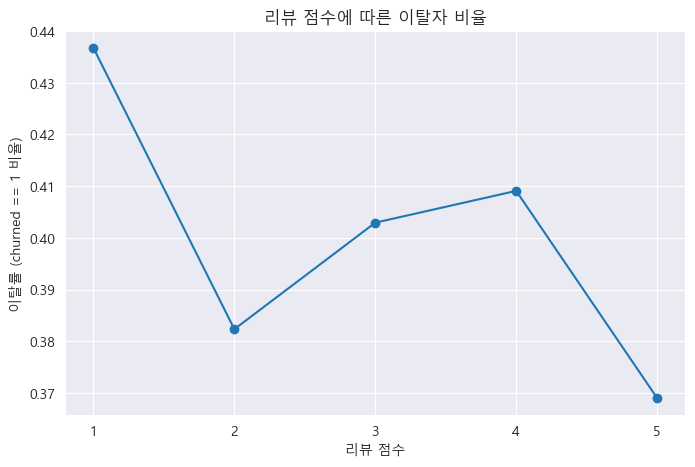

📉 리뷰 점수와 이탈률 간 상관계수: -0.660


In [55]:
'''
 -0.660 해석
음의 상관관계: 리뷰 점수가 높을수록 이탈률(churned==1) 이 낮아지는 경향

절댓값 0.6 이상 → 상당히 강한 상관관계

즉, 리뷰 점수가 높을수록 이탈 가능성이 꽤나 낮아진다는 의미입니다.
'''
import pandas as pd
import matplotlib.pyplot as plt

# 1. 고객별 이탈 여부(rfm 기준)를 final_df에 병합
final_df_with_churn = final_df.merge(rfm[['customer_unique_id', 'churned']], on='customer_unique_id', how='left')

# 2. 리뷰 점수별 이탈률 계산
review_score_churn = final_df_with_churn.groupby('review_score')['churned'].mean().reset_index()

# 3. 시각화
plt.figure(figsize=(8, 5))
plt.plot(review_score_churn['review_score'], review_score_churn['churned'], marker='o')
plt.title('리뷰 점수에 따른 이탈자 비율')
plt.xlabel('리뷰 점수')
plt.ylabel('이탈률 (churned == 1 비율)')
plt.grid(True)
plt.xticks(review_score_churn['review_score'])  # 리뷰 점수(1~5)
plt.show()

# 4. 상관관계 계산
correlation = review_score_churn.corr().loc['review_score', 'churned']
print(f"📉 리뷰 점수와 이탈률 간 상관계수: {correlation:.3f}")


## 데이터학습

In [56]:
from sklearn.model_selection import train_test_split

X = rfm.drop(['customer_unique_id', 'churned'], axis=1)
y = rfm['churned']



## 클래스 불균형 고려 한것

In [57]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# 3. Train / Validation / Test 데이터 분할
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
# → 학습:검증:테스트 = 60:20:20

# 4. 클래스 불균형 비율 계산
num_neg = (y_tr == 0).sum()
num_pos = (y_tr == 1).sum()
scale_pos_weight = num_neg / num_pos

# 5. XGBoost 모델 생성 및 학습
xgb_clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    early_stopping_rounds=10,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# 6. 테스트 예측 및 성능 평가
y_pred = xgb_clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


[0]	validation_0-logloss:0.68321
[1]	validation_0-logloss:0.67347
[2]	validation_0-logloss:0.66392
[3]	validation_0-logloss:0.65455
[4]	validation_0-logloss:0.64536
[5]	validation_0-logloss:0.63635
[6]	validation_0-logloss:0.62751
[7]	validation_0-logloss:0.61884
[8]	validation_0-logloss:0.61032
[9]	validation_0-logloss:0.60196
[10]	validation_0-logloss:0.59376
[11]	validation_0-logloss:0.58570
[12]	validation_0-logloss:0.57779
[13]	validation_0-logloss:0.57001
[14]	validation_0-logloss:0.56238
[15]	validation_0-logloss:0.55488
[16]	validation_0-logloss:0.54750
[17]	validation_0-logloss:0.54026
[18]	validation_0-logloss:0.53314
[19]	validation_0-logloss:0.52614
[20]	validation_0-logloss:0.51926
[21]	validation_0-logloss:0.51249
[22]	validation_0-logloss:0.50584
[23]	validation_0-logloss:0.49930
[24]	validation_0-logloss:0.49286
[25]	validation_0-logloss:0.48653
[26]	validation_0-logloss:0.48030
[27]	validation_0-logloss:0.47418
[28]	validation_0-logloss:0.46815
[29]	validation_0-loglos

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [09:33:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[73]	validation_0-logloss:0.27218
[74]	validation_0-logloss:0.26908
[75]	validation_0-logloss:0.26601
[76]	validation_0-logloss:0.26298
[77]	validation_0-logloss:0.25999
[78]	validation_0-logloss:0.25704
[79]	validation_0-logloss:0.25413
[80]	validation_0-logloss:0.25126
[81]	validation_0-logloss:0.24842
[82]	validation_0-logloss:0.24562
[83]	validation_0-logloss:0.24285
[84]	validation_0-logloss:0.24012
[85]	validation_0-logloss:0.23743
[86]	validation_0-logloss:0.23477
[87]	validation_0-logloss:0.23214
[88]	validation_0-logloss:0.22954
[89]	validation_0-logloss:0.22698
[90]	validation_0-logloss:0.22445
[91]	validation_0-logloss:0.22195
[92]	validation_0-logloss:0.21948
[93]	validation_0-logloss:0.21704
[94]	validation_0-logloss:0.21464
[95]	validation_0-logloss:0.21226
[96]	validation_0-logloss:0.20991
[97]	validation_0-logloss:0.20759
[98]	validation_0-logloss:0.20530
[99]	validation_0-logloss:0.20304
[100]	validation_0-logloss:0.20080
[101]	validation_0-logloss:0.19859
[102]	valida

In [58]:
print("Train size:", len(y_tr), "Class distribution:\n", y_tr.value_counts(normalize=True))
print("Validation size:", len(y_val), "Class distribution:\n", y_val.value_counts(normalize=True))
print("Test size:", len(y_test), "Class distribution:\n", y_test.value_counts(normalize=True))


Train size: 5631 Class distribution:
 churned
0    0.611082
1    0.388918
Name: proportion, dtype: float64
Validation size: 1878 Class distribution:
 churned
0    0.610756
1    0.389244
Name: proportion, dtype: float64
Test size: 1878 Class distribution:
 churned
0    0.611289
1    0.388711
Name: proportion, dtype: float64


## 피처(컬럼)와 타깃 간의 상관관계를 확인하는 것

recency가 상관관계가 높아서 feature로 사용못함

In [59]:
import pandas as pd
import numpy as np

# 데이터: X는 피처들, y는 타깃

# X, y가 각각 DataFrame, Series 형태라고 가정

# 피처 데이터프레임과 타깃을 합쳐서 상관관계 계산
df = X.copy()
df['target'] = y

# 상관관계 행렬 계산 (피어슨 상관계수)
corr = df.corr()

# 타깃과의 상관관계만 따로 추출하고 절대값 기준 정렬
target_corr = corr['target'].drop('target').abs().sort_values(ascending=False)

print("타깃과 피처 간 상관관계 (절대값 높은 순):")
print(target_corr)

# 상관계수가 0.8 이상인 피처 출력 (강한 상관)
leakage_candidates = target_corr[target_corr > 0.8]
print("\n잠재적 데이터 누수 피처 후보:")
print(leakage_candidates)


타깃과 피처 간 상관관계 (절대값 높은 순):
Recency                     0.841557
Avg_Delivery_Days           0.260529
Avg_Review_Response_Days    0.078314
Avg_Review_Score            0.047408
Frequency                   0.025036
Monetary                    0.013827
Name: target, dtype: float64

잠재적 데이터 누수 피처 후보:
Recency    0.841557
Name: target, dtype: float64


## 2. 모델 과적합 여부 확인

In [60]:
from sklearn.metrics import accuracy_score

# 학습 데이터 예측
y_train_pred = xgb_clf.predict(X_tr)
train_acc = accuracy_score(y_tr, y_train_pred)

# 검증 데이터 예측
y_val_pred = xgb_clf.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")

if train_acc - val_acc > 0.1:
    print("⚠️ 모델이 과적합일 가능성이 높습니다.")
else:
    print("모델 과적합 가능성 낮음.")


Train accuracy: 1.0000
Validation accuracy: 1.0000
모델 과적합 가능성 낮음.


## 조기 종료(early stopping) 로그 시각화 (XGBoost 제공 함수 이용)

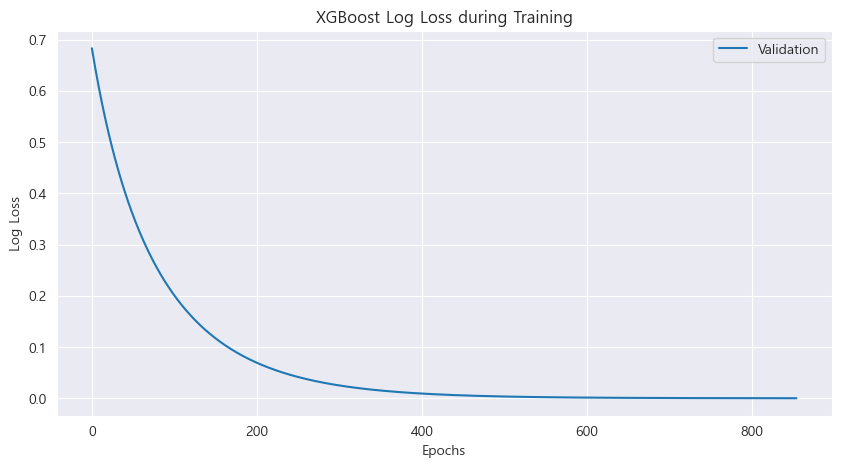

In [61]:
results = xgb_clf.evals_result()

epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(10,5))
# train 데이터 로그는 없으니 validation_0만 그림
plt.plot(x_axis, results['validation_0']['logloss'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss during Training')
plt.show()



## 클래스 불균형 고려 안한것

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. 데이터 분할 (Train:Val:Test = 60:20:20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# 2. XGBoost 모델 생성 (scale_pos_weight 제거)
xgb_clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    early_stopping_rounds=10,
    random_state=42
)

# 3. 모델 학습
xgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# 4. 테스트 예측 및 성능 평가
y_pred = xgb_clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


[0]	validation_0-logloss:0.65847
[1]	validation_0-logloss:0.64875
[2]	validation_0-logloss:0.63924
[3]	validation_0-logloss:0.62993
[4]	validation_0-logloss:0.62082
[5]	validation_0-logloss:0.61189
[6]	validation_0-logloss:0.60315
[7]	validation_0-logloss:0.59458
[8]	validation_0-logloss:0.58618
[9]	validation_0-logloss:0.57795
[10]	validation_0-logloss:0.56988
[11]	validation_0-logloss:0.56197
[12]	validation_0-logloss:0.55420
[13]	validation_0-logloss:0.54659
[14]	validation_0-logloss:0.53911
[15]	validation_0-logloss:0.53178
[16]	validation_0-logloss:0.52457
[17]	validation_0-logloss:0.51750
[18]	validation_0-logloss:0.51056
[19]	validation_0-logloss:0.50374
[20]	validation_0-logloss:0.49704
[21]	validation_0-logloss:0.49046
[22]	validation_0-logloss:0.48400
[23]	validation_0-logloss:0.47764
[24]	validation_0-logloss:0.47140
[25]	validation_0-logloss:0.46526
[26]	validation_0-logloss:0.45922
[27]	validation_0-logloss:0.45329
[28]	validation_0-logloss:0.44745
[29]	validation_0-loglos

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [09:33:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[55]	validation_0-logloss:0.32016
[56]	validation_0-logloss:0.31636
[57]	validation_0-logloss:0.31261
[58]	validation_0-logloss:0.30892
[59]	validation_0-logloss:0.30528
[60]	validation_0-logloss:0.30169
[61]	validation_0-logloss:0.29815
[62]	validation_0-logloss:0.29465
[63]	validation_0-logloss:0.29121
[64]	validation_0-logloss:0.28781
[65]	validation_0-logloss:0.28446
[66]	validation_0-logloss:0.28115
[67]	validation_0-logloss:0.27789
[68]	validation_0-logloss:0.27468
[69]	validation_0-logloss:0.27150
[70]	validation_0-logloss:0.26837
[71]	validation_0-logloss:0.26528
[72]	validation_0-logloss:0.26223
[73]	validation_0-logloss:0.25923
[74]	validation_0-logloss:0.25626
[75]	validation_0-logloss:0.25333
[76]	validation_0-logloss:0.25044
[77]	validation_0-logloss:0.24759
[78]	validation_0-logloss:0.24477
[79]	validation_0-logloss:0.24199
[80]	validation_0-logloss:0.23925
[81]	validation_0-logloss:0.23654
[82]	validation_0-logloss:0.23387
[83]	validation_0-logloss:0.23123
[84]	validatio

rfm 방식
- **구매 빈도 감소** (Frequency 감소)
- **최근 구매 금액 감소** (Monetary 감소)
- **리뷰 점수 감소 또는 리뷰 비활성화**
- **배송 지연 빈도 증가**

In [63]:
import pandas as pd
import numpy as np

# 1. 날짜형 컬럼 변환
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])
final_df['order_delivered_customer_date'] = pd.to_datetime(final_df['order_delivered_customer_date'])
final_df['review_creation_date'] = pd.to_datetime(final_df['review_creation_date'])
final_df['review_answer_timestamp'] = pd.to_datetime(final_df['review_answer_timestamp'])

# 2. 기준일 설정 (가장 마지막 주문일 + 1일)
reference_date = final_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 3. 배송 소요 시간 (배송일 - 주문일)
final_df['delivery_days'] = (final_df['order_delivered_customer_date'] - final_df['order_purchase_timestamp']).dt.days

# 4. 설문 응답 소요 시간 (리뷰 응답일 - 리뷰 작성일)
final_df['review_response_days'] = (final_df['review_answer_timestamp'] - final_df['review_creation_date']).dt.days

# 5. 구매 빈도 감소:
# 최근 6개월(180일)간 구매 횟수와 이전 6개월간 구매 횟수를 비교해 '구매 빈도 감소' 지표 생성
cutoff_date = reference_date - pd.Timedelta(days=180)

# 최근 6개월 구매 횟수
freq_recent = final_df[final_df['order_purchase_timestamp'] >= cutoff_date].groupby('customer_unique_id')['order_id'].nunique().rename('Freq_Recent')

# 이전 6개월 구매 횟수
freq_before = final_df[(final_df['order_purchase_timestamp'] < cutoff_date) & (final_df['order_purchase_timestamp'] >= cutoff_date - pd.Timedelta(days=180))].groupby('customer_unique_id')['order_id'].nunique().rename('Freq_Before')

# 6개월간 빈도 비교 지표 생성
freq_compare = pd.concat([freq_recent, freq_before], axis=1).fillna(0)
freq_compare['Frequency_Decreased'] = (freq_compare['Freq_Recent'] < freq_compare['Freq_Before']).astype(int)

# 6. 최근 구매 금액 감소: 최근 6개월과 이전 6개월 구매 총액 비교
monetary_recent = final_df[final_df['order_purchase_timestamp'] >= cutoff_date].groupby('customer_unique_id')['payment_value'].sum().rename('Monetary_Recent')
monetary_before = final_df[(final_df['order_purchase_timestamp'] < cutoff_date) & (final_df['order_purchase_timestamp'] >= cutoff_date - pd.Timedelta(days=180))].groupby('customer_unique_id')['payment_value'].sum().rename('Monetary_Before')

monetary_compare = pd.concat([monetary_recent, monetary_before], axis=1).fillna(0)
monetary_compare['Monetary_Decreased'] = (monetary_compare['Monetary_Recent'] < monetary_compare['Monetary_Before']).astype(int)

# 7. 리뷰 점수 감소 또는 리뷰 비활성화
# - 리뷰 점수 최근 6개월 평균 vs 이전 6개월 평균 비교
review_recent = final_df[final_df['order_purchase_timestamp'] >= cutoff_date].groupby('customer_unique_id')['review_score'].mean().rename('ReviewScore_Recent')
review_before = final_df[(final_df['order_purchase_timestamp'] < cutoff_date) & (final_df['order_purchase_timestamp'] >= cutoff_date - pd.Timedelta(days=180))].groupby('customer_unique_id')['review_score'].mean().rename('ReviewScore_Before')

review_compare = pd.concat([review_recent, review_before], axis=1)
# 리뷰 점수 감소 또는 리뷰 점수 없으면 (NaN 포함) 1로 표시 (이탈 위험)
review_compare['Review_Decreased_or_NoReview'] = ((review_compare['ReviewScore_Recent'] < review_compare['ReviewScore_Before']) | review_compare['ReviewScore_Recent'].isna()).astype(int)

# 8. 배송 지연 빈도 증가
# 배송 지연 여부 : 배송 소요시간 > 평균 배송 소요시간 전체 중간값 이상일 때 지연으로 정의
median_delivery_days = final_df['delivery_days'].median()
final_df['is_late_delivery'] = (final_df['delivery_days'] > median_delivery_days).astype(int)

# 최근 6개월 배송 지연 비율과 이전 6개월 배송 지연 비율 계산 후 비교
late_rate_recent = final_df[final_df['order_purchase_timestamp'] >= cutoff_date].groupby('customer_unique_id')['is_late_delivery'].mean().rename('LateRate_Recent')
late_rate_before = final_df[(final_df['order_purchase_timestamp'] < cutoff_date) & (final_df['order_purchase_timestamp'] >= cutoff_date - pd.Timedelta(days=180))].groupby('customer_unique_id')['is_late_delivery'].mean().rename('LateRate_Before')

late_compare = pd.concat([late_rate_recent, late_rate_before], axis=1).fillna(0)
late_compare['LateRate_Increased'] = (late_compare['LateRate_Recent'] > late_compare['LateRate_Before']).astype(int)

# 9. 기존 RFM 계산 (Frequency, Monetary은 전체 기간 기준)
rfm_base = final_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',
    'payment_value': 'sum',
    'delivery_days': 'mean',
    'review_response_days': 'mean'
}).reset_index()

rfm_base.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary', 'Avg_Delivery_Days', 'Avg_Review_Response_Days']

# 10. 모든 지표 합치기
rfm_full = rfm_base.set_index('customer_unique_id') \
    .join(freq_compare[['Frequency_Decreased']]) \
    .join(monetary_compare[['Monetary_Decreased']]) \
    .join(review_compare[['Review_Decreased_or_NoReview']]) \
    .join(late_compare[['LateRate_Increased']]) \
    .reset_index()

# 결과 확인
print(rfm_full.head())


                 customer_unique_id  Recency  Frequency  Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90   
1  000ec5bff359e1c0ad76a81a45cb598f        9          1     27.75   
2  00172711b30d52eea8b313a7f2cced02       33          1    122.07   
3  001928b561575b2821c92254a2327d06        5          1    164.81   
4  0019e8c501c85848ac0966d45226fa1d      121          1    197.27   

   Avg_Delivery_Days  Avg_Review_Response_Days  Frequency_Decreased  \
0                6.0                       4.0                  0.0   
1                6.0                       2.0                  0.0   
2               10.0                       2.0                  0.0   
3                6.0                       3.0                  0.0   
4               17.0                       1.0                  0.0   

   Monetary_Decreased  Review_Decreased_or_NoReview  LateRate_Increased  
0                 0.0                           0.0                 0.0  
1         

In [64]:
# 1. 고객별 주문 날짜를 오름차순으로 정렬 후 재구매 간격 계산
final_df_sorted = final_df.sort_values(['customer_unique_id', 'order_purchase_timestamp'])

# 2. 고객별 재구매 간격(일 단위) 계산
final_df_sorted['prev_order_date'] = final_df_sorted.groupby('customer_unique_id')['order_purchase_timestamp'].shift(1)
final_df_sorted['days_since_last_purchase'] = (final_df_sorted['order_purchase_timestamp'] - final_df_sorted['prev_order_date']).dt.days

# 3. 고객별 최대 재구매 간격 계산 (재구매 없는 고객은 최대값이 NaN이 될 수 있음)
max_gap = final_df_sorted.groupby('customer_unique_id')['days_since_last_purchase'].max().fillna(0)

# 4. 기준일(최신 주문일 + 1일)과 고객별 마지막 주문일 차이도 확인하여,
# 마지막 주문일 기준 3개월 이상 지난 경우도 이탈로 간주
last_order = final_df.groupby('customer_unique_id')['order_purchase_timestamp'].max()
days_since_last_order = (reference_date - last_order).dt.days

# 5. 이탈 타깃 생성:
# 최대 재구매 간격이 90일 초과 OR 마지막 주문일 기준 90일 초과 시 이탈(1), 아니면 0
churn_target = ((max_gap > 90) | (days_since_last_order > 90)).astype(int).rename('Churn_Target')

# 6. 기존 rfm_full에 타깃 컬럼 추가
rfm_full = rfm_full.set_index('customer_unique_id').join(churn_target).reset_index()

# 결과 확인
print(rfm_full[['customer_unique_id', 'Churn_Target']].head())


                 customer_unique_id  Churn_Target
0  0000366f3b9a7992bf8c76cfdf3221e2             1
1  000ec5bff359e1c0ad76a81a45cb598f             0
2  00172711b30d52eea8b313a7f2cced02             0
3  001928b561575b2821c92254a2327d06             0
4  0019e8c501c85848ac0966d45226fa1d             1


In [429]:
from sklearn.model_selection import train_test_split

X = rfm.drop(['customer_unique_id', 'churned','Recency'], axis=1)
y = rfm['churned']



In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. 데이터 분할 (Train:Val:Test = 60:20:20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# 2. XGBoost 모델 생성 (scale_pos_weight 제거)
xgb_clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    early_stopping_rounds=10,
    random_state=42
)

# 3. 모델 학습
xgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# 4. 테스트 예측 및 성능 평가
y_pred = xgb_clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


[0]	validation_0-logloss:0.65847
[1]	validation_0-logloss:0.64875
[2]	validation_0-logloss:0.63924
[3]	validation_0-logloss:0.62993
[4]	validation_0-logloss:0.62082
[5]	validation_0-logloss:0.61189
[6]	validation_0-logloss:0.60315
[7]	validation_0-logloss:0.59458
[8]	validation_0-logloss:0.58618
[9]	validation_0-logloss:0.57795
[10]	validation_0-logloss:0.56988
[11]	validation_0-logloss:0.56197
[12]	validation_0-logloss:0.55420
[13]	validation_0-logloss:0.54659
[14]	validation_0-logloss:0.53911
[15]	validation_0-logloss:0.53178
[16]	validation_0-logloss:0.52457
[17]	validation_0-logloss:0.51750
[18]	validation_0-logloss:0.51056
[19]	validation_0-logloss:0.50374
[20]	validation_0-logloss:0.49704
[21]	validation_0-logloss:0.49046
[22]	validation_0-logloss:0.48400
[23]	validation_0-logloss:0.47764
[24]	validation_0-logloss:0.47140
[25]	validation_0-logloss:0.46526
[26]	validation_0-logloss:0.45922
[27]	validation_0-logloss:0.45329
[28]	validation_0-logloss:0.44745
[29]	validation_0-loglos

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [09:36:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[45]	validation_0-logloss:0.36134
[46]	validation_0-logloss:0.35694
[47]	validation_0-logloss:0.35261
[48]	validation_0-logloss:0.34834
[49]	validation_0-logloss:0.34414
[50]	validation_0-logloss:0.34000
[51]	validation_0-logloss:0.33591
[52]	validation_0-logloss:0.33189
[53]	validation_0-logloss:0.32792
[54]	validation_0-logloss:0.32401
[55]	validation_0-logloss:0.32016
[56]	validation_0-logloss:0.31636
[57]	validation_0-logloss:0.31261
[58]	validation_0-logloss:0.30892
[59]	validation_0-logloss:0.30528
[60]	validation_0-logloss:0.30169
[61]	validation_0-logloss:0.29815
[62]	validation_0-logloss:0.29465
[63]	validation_0-logloss:0.29121
[64]	validation_0-logloss:0.28781
[65]	validation_0-logloss:0.28446
[66]	validation_0-logloss:0.28115
[67]	validation_0-logloss:0.27789
[68]	validation_0-logloss:0.27468
[69]	validation_0-logloss:0.27150
[70]	validation_0-logloss:0.26837
[71]	validation_0-logloss:0.26528
[72]	validation_0-logloss:0.26223
[73]	validation_0-logloss:0.25923
[74]	validatio

# 전체데이터중에서 재구매고객 3% 꺼내서 3개월 기준으로 이탈 고객 예측

In [66]:
import pandas as pd

# 1. 고객별 주문 횟수 계산
customer_order_counts = final_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_order_counts.columns = ['customer_unique_id', 'order_count']

# 2. 주문 횟수가 2회 이상인 고객 필터링
repeat_customers = customer_order_counts[customer_order_counts['order_count'] >= 2]

# 3. 원본 데이터에서 해당 고객만 추출 (copy() 추가!)
repeat_customers_df = final_df[final_df['customer_unique_id'].isin(repeat_customers['customer_unique_id'])].copy()


# 4. 결과 확인
print("🧾 두 번 이상 구매한 고객 수:", repeat_customers['customer_unique_id'].nunique())
print("📦 추출된 주문 수:", repeat_customers_df.shape[0])
print(repeat_customers_df.head())



🧾 두 번 이상 구매한 고객 수: 100
📦 추출된 주문 수: 222
                              order_id                       customer_id  \
339   a7076e7aba13de8b66d95a55811290ed  1ae196062dab95e434e781a5319f0ab9   
768   27a78fdbe7b915a0596af3a5803a41cb  107d449d8a73c9dfd9673df8ea684348   
935   cd81fccdeffb11e33de701e2c53c85c6  e07792fb0958a7d0faff87fb1aa58f8e   
1731  04b7738ad5fbb213eeb7a2145bea8242  46c8678b6afe29d90d3142f31ff01791   
3683  419158f0fcd3a19edca60d45d531849e  ac13f7c32f187f3ee52677e5270e85e0   

     order_status order_purchase_timestamp    order_approved_at  \
339     delivered      2018-05-14 11:04:55  2018-05-15 04:35:02   
768     delivered      2018-05-14 16:18:26  2018-05-14 16:36:58   
935     delivered      2018-04-26 22:47:26  2018-04-26 22:55:14   
1731    delivered      2018-05-16 10:58:56  2018-05-17 02:15:23   
3683    delivered      2018-04-13 13:19:27  2018-04-14 02:15:32   

     order_delivered_carrier_date order_delivered_customer_date  \
339           2018-05-15 16:22:00 

## RFM 데이터 생성

In [67]:
import pandas as pd

# 1. 날짜형 컬럼 변환
repeat_customers_df['order_purchase_timestamp'] = pd.to_datetime(repeat_customers_df['order_purchase_timestamp'])
repeat_customers_df['order_delivered_customer_date'] = pd.to_datetime(repeat_customers_df['order_delivered_customer_date'])
repeat_customers_df['review_creation_date'] = pd.to_datetime(repeat_customers_df['review_creation_date'])
repeat_customers_df['review_answer_timestamp'] = pd.to_datetime(repeat_customers_df['review_answer_timestamp'])

# 2. 기준일 설정 (가장 마지막 주문일 + 1일)
reference_date = repeat_customers_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# 3. 배송 소요 시간 (배송일 - 주문일)
repeat_customers_df['delivery_days'] = (
    repeat_customers_df['order_delivered_customer_date'] - repeat_customers_df['order_purchase_timestamp']
).dt.days

# 4. 설문 응답 소요 시간 (리뷰 응답일 - 리뷰 작성일)
repeat_customers_df['review_response_days'] = (
    repeat_customers_df['review_answer_timestamp'] - repeat_customers_df['review_creation_date']
).dt.days

# 5. RFM + 시간 피처 계산
rfm = repeat_customers_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',             # Frequency
    'payment_value': 'sum',            # Monetary
    'delivery_days': 'mean',           # 평균 배송 소요 일수
    'review_response_days': 'mean'     # 평균 리뷰 응답 소요 일수
}).reset_index()

# 6. 컬럼명 정리
rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary',
               'Avg_Delivery_Days', 'Avg_Review_Response_Days']

# 7. 결과 확인
print(rfm.head())
print("\n결측치 확인:\n", rfm.isnull().sum())


                 customer_unique_id  Recency  Frequency  Monetary  \
0  013ef03e0f3f408dd9bf555e4edcdc0a       37          2    245.37   
1  02e9109b7e0a985108b43e573b6afb23      104          2    234.13   
2  0341bbd5c969923a0f801b9e2d10a7b8       87          2   1999.68   
3  03ef7f03905227e15c7b6c860554b3cb       38          2    238.55   
4  0509ab034845adb0b4c91b6f0e7b7260      113          2    339.46   

   Avg_Delivery_Days  Avg_Review_Response_Days  
0                3.0                       0.5  
1                6.0                       9.0  
2                8.0                       2.5  
3               15.0                       1.0  
4                3.0                       1.0  

결측치 확인:
 customer_unique_id          0
Recency                     0
Frequency                   0
Monetary                    0
Avg_Delivery_Days           0
Avg_Review_Response_Days    0
dtype: int64


In [68]:
rfm['Avg_Review_Response_Days'] = rfm['Avg_Review_Response_Days'].fillna(0)

In [69]:
rfm.isnull().sum()

customer_unique_id          0
Recency                     0
Frequency                   0
Monetary                    0
Avg_Delivery_Days           0
Avg_Review_Response_Days    0
dtype: int64

## 이탈 여부(label) 만들기

In [70]:
# 기준: Recency가 90일 이상이면 '이탈자'
rfm['churned'] = (rfm['Recency'] >= 90).astype(int)

In [71]:
rfm

,customer_unique_id,Recency,Frequency,Monetary,Avg_Delivery_Days,Avg_Review_Response_Days,churned
0,013ef03e0f3f408dd9bf555e4edcdc0a,37,2,245.37,3.0,0.5,0
1,02e9109b7e0a985108b43e573b6afb23,104,2,234.13,6.0,9.0,1
2,0341bbd5c969923a0f801b9e2d10a7b8,87,2,1999.68,8.0,2.5,0
3,03ef7f03905227e15c7b6c860554b3cb,38,2,238.55,15.0,1.0,0
4,0509ab034845adb0b4c91b6f0e7b7260,113,2,339.46,3.0,1.0,1
...,...,...,...,...,...,...,...
95,f6dc4789e4669873c35f8f92fdbed89f,17,2,448.31,7.0,2.0,0
96,f8bc1d81f395f6239a2a5ab1b9edf1ab,6,2,359.96,7.0,3.5,0
97,fc2261ae2c583aa2e68241456a6467c8,105,2,579.11,15.5,0.0,1
98,fc24db02becd484accefaa5af59c18b1,62,2,1588.95,4.5,0.0,0


In [72]:
rfm['churned'].value_counts()

churned
0    76
1    24
Name: count, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

X = rfm.drop(['customer_unique_id', 'churned'], axis=1)
y = rfm['churned']


## 클래스 불균형 고려 안한것

In [74]:
## 클래스 불균형 고려 안한것
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. 데이터 분할 (Train:Val:Test = 60:20:20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

# 2. XGBoost 모델 생성 (scale_pos_weight 제거)
xgb_clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    early_stopping_rounds=10,
    random_state=42
)

# 3. 모델 학습
xgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# 4. 테스트 예측 및 성능 평가
y_pred = xgb_clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


[0]	validation_0-logloss:0.55522
[1]	validation_0-logloss:0.54752
[2]	validation_0-logloss:0.53999
[3]	validation_0-logloss:0.53262
[4]	validation_0-logloss:0.52541
[5]	validation_0-logloss:0.51836
[6]	validation_0-logloss:0.51145
[7]	validation_0-logloss:0.50468
[8]	validation_0-logloss:0.49805
[9]	validation_0-logloss:0.49155
[10]	validation_0-logloss:0.48518
[11]	validation_0-logloss:0.47894
[12]	validation_0-logloss:0.47282
[13]	validation_0-logloss:0.46682
[14]	validation_0-logloss:0.46093
[15]	validation_0-logloss:0.45516
[16]	validation_0-logloss:0.44949
[17]	validation_0-logloss:0.44392
[18]	validation_0-logloss:0.43846
[19]	validation_0-logloss:0.43310
[20]	validation_0-logloss:0.42783
[21]	validation_0-logloss:0.42266
[22]	validation_0-logloss:0.41757
[23]	validation_0-logloss:0.41258
[24]	validation_0-logloss:0.40767
[25]	validation_0-logloss:0.40285
[26]	validation_0-logloss:0.39811
[27]	validation_0-logloss:0.39345
[28]	validation_0-logloss:0.38886
[29]	validation_0-loglos

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [09:37:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[97]	validation_0-logloss:0.19168
[98]	validation_0-logloss:0.18993
[99]	validation_0-logloss:0.18820
[100]	validation_0-logloss:0.18650
[101]	validation_0-logloss:0.18481
[102]	validation_0-logloss:0.18314
[103]	validation_0-logloss:0.18149
[104]	validation_0-logloss:0.17986
[105]	validation_0-logloss:0.17824
[106]	validation_0-logloss:0.17665
[107]	validation_0-logloss:0.17508
[108]	validation_0-logloss:0.17352
[109]	validation_0-logloss:0.17198
[110]	validation_0-logloss:0.17046
[111]	validation_0-logloss:0.16895
[112]	validation_0-logloss:0.16747
[113]	validation_0-logloss:0.16599
[114]	validation_0-logloss:0.16454
[115]	validation_0-logloss:0.16310
[116]	validation_0-logloss:0.16168
[117]	validation_0-logloss:0.16028
[118]	validation_0-logloss:0.15888
[119]	validation_0-logloss:0.15751
[120]	validation_0-logloss:0.15615
[121]	validation_0-logloss:0.15481
[122]	validation_0-logloss:0.15348
[123]	validation_0-logloss:0.15216
[124]	validation_0-logloss:0.15086
[125]	validation_0-logl

## 불균형고려한것

In [75]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# 3. Train / Validation / Test 데이터 분할
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
# → 학습:검증:테스트 = 60:20:20

# 4. 클래스 불균형 비율 계산
num_neg = (y_tr == 0).sum()
num_pos = (y_tr == 1).sum()
scale_pos_weight = num_neg / num_pos

# 5. XGBoost 모델 생성 및 학습
xgb_clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    early_stopping_rounds=10,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

xgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# 6. 테스트 예측 및 성능 평가
y_pred = xgb_clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

[0]	validation_0-logloss:0.68399
[1]	validation_0-logloss:0.67500
[2]	validation_0-logloss:0.66617
[3]	validation_0-logloss:0.65750
[4]	validation_0-logloss:0.64899
[5]	validation_0-logloss:0.64062
[6]	validation_0-logloss:0.63240
[7]	validation_0-logloss:0.62433
[8]	validation_0-logloss:0.61639
[9]	validation_0-logloss:0.60859
[10]	validation_0-logloss:0.60092
[11]	validation_0-logloss:0.59338
[12]	validation_0-logloss:0.58597
[13]	validation_0-logloss:0.57868
[14]	validation_0-logloss:0.57151
[15]	validation_0-logloss:0.56446
[16]	validation_0-logloss:0.55753
[17]	validation_0-logloss:0.55070
[18]	validation_0-logloss:0.54399
[19]	validation_0-logloss:0.53739
[20]	validation_0-logloss:0.53088
[21]	validation_0-logloss:0.52449
[22]	validation_0-logloss:0.51819
[23]	validation_0-logloss:0.51199
[24]	validation_0-logloss:0.50589
[25]	validation_0-logloss:0.49988
[26]	validation_0-logloss:0.49396
[27]	validation_0-logloss:0.48814
[28]	validation_0-logloss:0.48240
[29]	validation_0-loglos

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [09:38:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[52]	validation_0-logloss:0.36716
[53]	validation_0-logloss:0.36316
[54]	validation_0-logloss:0.35920
[55]	validation_0-logloss:0.35530
[56]	validation_0-logloss:0.35146
[57]	validation_0-logloss:0.34766
[58]	validation_0-logloss:0.34391
[59]	validation_0-logloss:0.34022
[60]	validation_0-logloss:0.33657
[61]	validation_0-logloss:0.33297
[62]	validation_0-logloss:0.32942
[63]	validation_0-logloss:0.32591
[64]	validation_0-logloss:0.32245
[65]	validation_0-logloss:0.31903
[66]	validation_0-logloss:0.31566
[67]	validation_0-logloss:0.31233
[68]	validation_0-logloss:0.30905
[69]	validation_0-logloss:0.30580
[70]	validation_0-logloss:0.30260
[71]	validation_0-logloss:0.29944
[72]	validation_0-logloss:0.29632
[73]	validation_0-logloss:0.29323
[74]	validation_0-logloss:0.29019
[75]	validation_0-logloss:0.28719
[76]	validation_0-logloss:0.28422
[77]	validation_0-logloss:0.28129
[78]	validation_0-logloss:0.27839
[79]	validation_0-logloss:0.27554
[80]	validation_0-logloss:0.27271
[81]	validatio